In [121]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt


# loading dataset


In [122]:
df = pd.read_csv(r'C:\Users\91963\Downloads\titanic_dataset.csv')

In [123]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Making ‘PassengerId’ as the index column

In [124]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# basic details of the dataset

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill in all the missing values present in all the columns in the dataset

In [127]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [129]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [132]:
df.drop(['Cabin'],axis=1,inplace=True)

In [133]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x25f58c42190>,
 'caps': [<matplotlib.lines.Line2D at 0x25f58c42730>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f58c42040>],
 'medians': [<matplotlib.lines.Line2D at 0x25f58c42cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f58c42fa0>],
 'means': []}

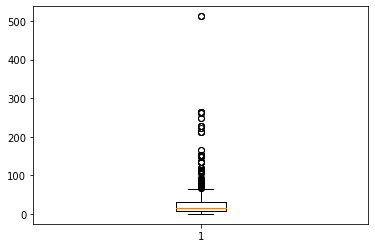

In [134]:
plt.boxplot(df['Fare'])

In [135]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')

In [136]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [137]:
df['Fare'].median()

14.4542

In [138]:
IQR=Q3-Q1

In [139]:
print(IQR)

23.0896


In [140]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [141]:
print(low_limit)
print(up_limit)

-26.724
65.6344


In [142]:
outlier=[]
for X in df ['Fare']:
    if((X>up_limit)or (X<low_limit)):
        outlier.append(X)

In [143]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [144]:
ind2=df['Fare']>up_limit

In [145]:
df.loc[ind2].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [146]:
df.loc[ind2].index.tolist()

[1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879]

In [147]:
df.drop([1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


{'whiskers': [<matplotlib.lines.Line2D at 0x25f58d03040>,
 'caps': [<matplotlib.lines.Line2D at 0x25f58d035e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f58cfbdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x25f58d03b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f58d03e50>],
 'means': []}

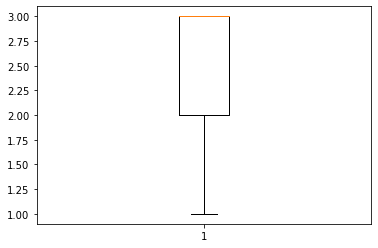

In [148]:
plt.boxplot(df['Pclass'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25f58d37b80>,
 'caps': [<matplotlib.lines.Line2D at 0x25f58d40160>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f58d378b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25f58d40700>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f58d409d0>],
 'means': []}

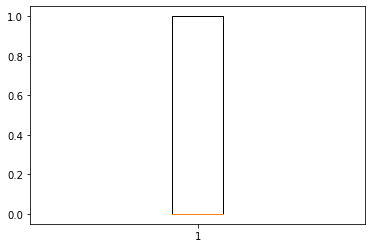

In [149]:
plt.boxplot(df['Survived'])

# min max scaling on the feature set (Take ‘Survived’ as target)


In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
mms=MinMaxScaler(feature_range=(0,1))

In [152]:
Survived_array =df[['Survived']]

In [154]:
Survived_array_scaled = mms.fit_transform(Survived_array)

In [156]:
df['Survived'] = Survived_array_scaled

In [157]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
